<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3">Feature Scaling</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4">Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#How-many-prinicpal-components?" data-toc-modified-id="How-many-prinicpal-components?-4.1">How many prinicpal components?</a></span></li><li><span><a href="#Compare-variation-with-different-number-of-PCs" data-toc-modified-id="Compare-variation-with-different-number-of-PCs-4.2">Compare variation with different number of PCs</a></span></li></ul></li><li><span><a href="#Principal-component-intuition" data-toc-modified-id="Principal-component-intuition-5">Principal component intuition</a></span></li></ul></div>

# Introduction
I would like to demonstrate how to use principal component analysis to reduce the dimensionality of a dataset, specifically the **breast_cancer** dataset from the scikit-learn package.
This example is inspired from the following course, where it is covered: [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

# Exploratory Data Analysis

In [2]:
cancer_data = datasets.load_breast_cancer()

print(f"Keys of the cancer dataset are: \n {list(cancer_data.keys())}")

Keys of the cancer dataset are: 
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


The input data, or observations of the characteristics of the tumours is found in the dataset using: 
```
> cancer_data['data']
```
Whilst the response variable, if the cancer is malignant (0) or benign (1), can be found in the target variable, found using:
```
> cancer_data['target']
```
Let's inspect the input data:

In [3]:
print(f"Shape of data is: {cancer_data['data'].shape}")

Shape of data is: (569, 30)


In [4]:
print(f"First few observations of the target variable are: \n {cancer_data['target'][:10]}. "
      f"\n \n The unique values are: \n {np.unique(cancer_data['target'])}")

First few observations of the target variable are: 
 [0 0 0 0 0 0 0 0 0 0]. 
 
 The unique values are: 
 [0 1]


Let's inspect the input data:

In [5]:
pd.DataFrame(cancer_data['data'],
             columns=cancer_data['feature_names']).head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Feature Scaling
As we can see above, the scales of all of the variables in the data are not similar, therefore we need to carry out feature scaling (also known as normalisation and standardisation). This is crucial to ensure that significant values (such as mean area, when compared to mean smoothness) do  not dominate the model due to their large magnitude.

We will use the scaling tool build into **scikit-learn**, StandardScaler, to scale each feature and ensure it has single unit variance. We will carry out these steps below.

In [6]:
from sklearn.preprocessing import StandardScaler
cancer_input = cancer_data['data']

scaler = StandardScaler()
scaler.fit(cancer_input)
cancer_scaled = scaler.transform(cancer_input)

Now we can see the scaled data, and compare it with the original values from above.

In [7]:
pd.DataFrame(data=cancer_scaled, 
             columns=cancer_data['feature_names']).head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


To check that the data has unit variance, and mean centred around zero, we can look at the describe method on the dataframe, and confirm the features have been scaled to have a mean of zero, and a standard deviation of 1.

In [8]:
pd.DataFrame(data=cancer_scaled, 
             columns=cancer_data['feature_names']).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


We can confirm the data has been scaled as reported above.

Furthermore, there are many features in the dataset, and we'd like to get a better intuition for which features are important in determining if a tumour is malignant or benign.

In this case, we will attempt to reduce the dimensionality of the data using principal component analysis whilst still retaining as much of the original variation in the data as possible.

# Principal Component Analysis

Generally it is quite difficult to visualise more than 2, or 3 dimensions. So, with this 30-dimensional dataset, we will attempt to carry out a dimensionality reduction using two principal components. That is, we will be mapping the data from 30-dimensional space, to two dimensions.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(cancer_scaled)
x_pca = pca.transform(cancer_scaled)

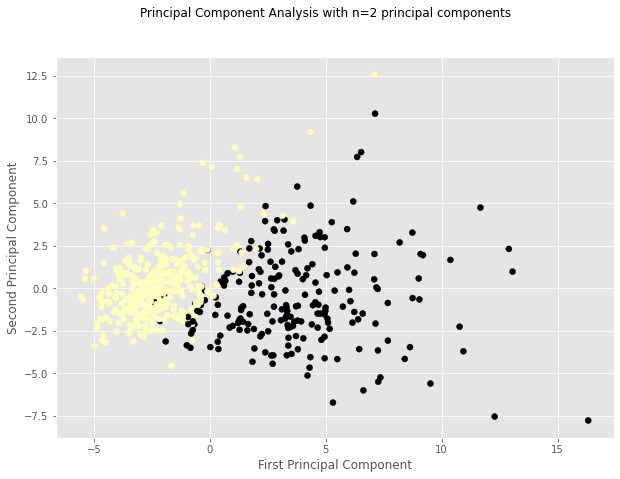

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.scatter(x=x_pca[:,0],
            y=x_pca[:,1],
            marker='o',
            c=cancer_data['target'], # the colouring is according to malignant/benign
            cmap='magma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.suptitle("Principal Component Analysis with n=2 principal components")
plt.show()


There is a clear difference between the malignant (white) and benign tumours (black), in terms of the separation between the values of the principal components.

It would appear that using the principal component analysis dimensionality reduction to two principal components gives a clear separation between the malignant and benign tumours. It appears, at first glance, that quite a lot of the variation in the original, 30-dimensional dataset can be explained with two principal components.

## How many prinicpal components?
In order to establish what is a good number of components to choose for principal component analysis, one can see what percentage of the overall variation in the data described by each principal component. For this task, one would look at the eigenvalues of the problem, and these are sorted from the largest to the smallest.

In this case, we have this stored within the PCA object from *sklearn*

In [11]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Therefore, in this case, we can see that the explained variance by the first two principal components is 44.3% and 19% of the variance. 

Therefore, by compressing the data from 30-dimensions originally to two dimensions, we have kept almost two-thirds of the original variation in the data.

## Compare variation with different number of PCs
Below we will run some code to investigate how the choice of the number of principal components affects the amount of original variation retained in the mapped data.

In [12]:
num_pc_iter = [5, 10, 15, 20, 25, 30]
variation_explained = []

for i, num_pc in enumerate(num_pc_iter, 1): # get enumerate to start at one
    # use PCA on the transformed dataset to reduce dimensions
    print("*"*30)
    print(f"Iteration {i}. \n "
          f"Number of principal components to choose: {num_pc}")
    pca_iter = PCA(n_components=num_pc)
    pca_iter.fit(cancer_scaled)
    # transform the data using the num of principal components
    transformed_data = pca_iter.transform(cancer_scaled)
    transformed_variance = pca_iter.explained_variance_ratio_

    # print(f"The original shape of data was {cancer.shape}. \n"
    #       f"The shape of the new mapped data is {transformed_data.shape} \n")
    variation_explained_i = np.cumsum(transformed_variance)
    variation_explained.append(variation_explained_i[-1])
    print(f"Explained {100 * variation_explained_i[-1]: .2f}% of total variance ")
    

    # map the data back to original space following compression
    cancer_re_mapped = pca_iter.inverse_transform(transformed_data)
    diff_new_old = cancer_re_mapped - cancer_scaled

    print(f"Max sum of differences for features (between newly mapped and original)"
          f" {np.max(np.sum(diff_new_old, axis=0)) :.2E} \n")


******************************
Iteration 1. 
 Number of principal components to choose: 5
Explained  84.73% of total variance 
Max sum of differences for features (between newly mapped and original) 8.64E-14 

******************************
Iteration 2. 
 Number of principal components to choose: 10
Explained  95.16% of total variance 
Max sum of differences for features (between newly mapped and original) 7.16E-14 

******************************
Iteration 3. 
 Number of principal components to choose: 15
Explained  98.65% of total variance 
Max sum of differences for features (between newly mapped and original) 6.85E-14 

******************************
Iteration 4. 
 Number of principal components to choose: 20
Explained  99.56% of total variance 
Max sum of differences for features (between newly mapped and original) 5.30E-14 

******************************
Iteration 5. 
 Number of principal components to choose: 25
Explained  99.94% of total variance 
Max sum of differences for fe

In [13]:
variation_retention_results = pd.DataFrame(
    index=num_pc_iter,
    data=["{0:.2f}%".format(val * 100) for val in variation_explained]).reset_index()
variation_retention_results.columns = [
    'Number of Principal Components', 'Percentage of original variation retained']

variation_retention_results

,Number of Principal Components,Percentage of original variation retained
0,5,84.73%
1,10,95.16%
2,15,98.65%
3,20,99.56%
4,25,99.94%
5,30,100.00%


We can see that using 15 principal components, mapping the original 30-dimensional data to 15 components will still give us almost 99% of the variance of the original dataset, which is very good. Going forward, if we'd like to use this data, one would be tempted to use this 15 dimensional data as it will carry half as much information in size as the original dataset, and therefore calculations can be carried out faster.

Let's view this results in visual format.

Text(0.5, 0, 'Number of principal components used')

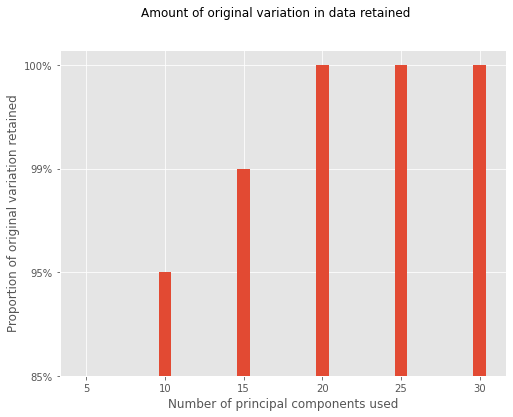

In [14]:
plt.figure(figsize=(8,6))
plt.bar(x=num_pc_iter, 
        height=["{0:.0f}%".format(val * 100) for val in variation_explained])
plt.suptitle("Amount of original variation in data retained")
plt.ylabel("Proportion of original variation retained")
plt.xlabel("Number of principal components used")

# Principal component intuition
Whilst it is useful to achieve dimensionality reduction using principal component analysis, the intuition of a principal component is not as basic as saying that the first principal component corresponds to the *mean_concavity* feature (how concave in shape the tumour is), for example.

Instead what the components correspond to is a linear combination of the input features. Let's see this below:

In [15]:
components_df = pd.DataFrame(pca.components_, 
                             columns=cancer_data['feature_names'])

components_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


Above, we see that the first principal component, with the row name *0*, is a combination of the original input components (which have been feature scaled):
\
\begin{align}
    PrincipalComponent_1 = 0.219*x_1 + 0.104*x_2 + 0.228*x_3
\end{align}
\
where $x_1$ is the mean radius, $x_2$ the mean texture, $x_3$ the mean perimeter, and so on...

Below we will plot a heatmap of the first two principal components, the intuition being that the lighter (/darker) colours show higher (/lower) correlation with the specific feature in the columns. 

<AxesSubplot:>

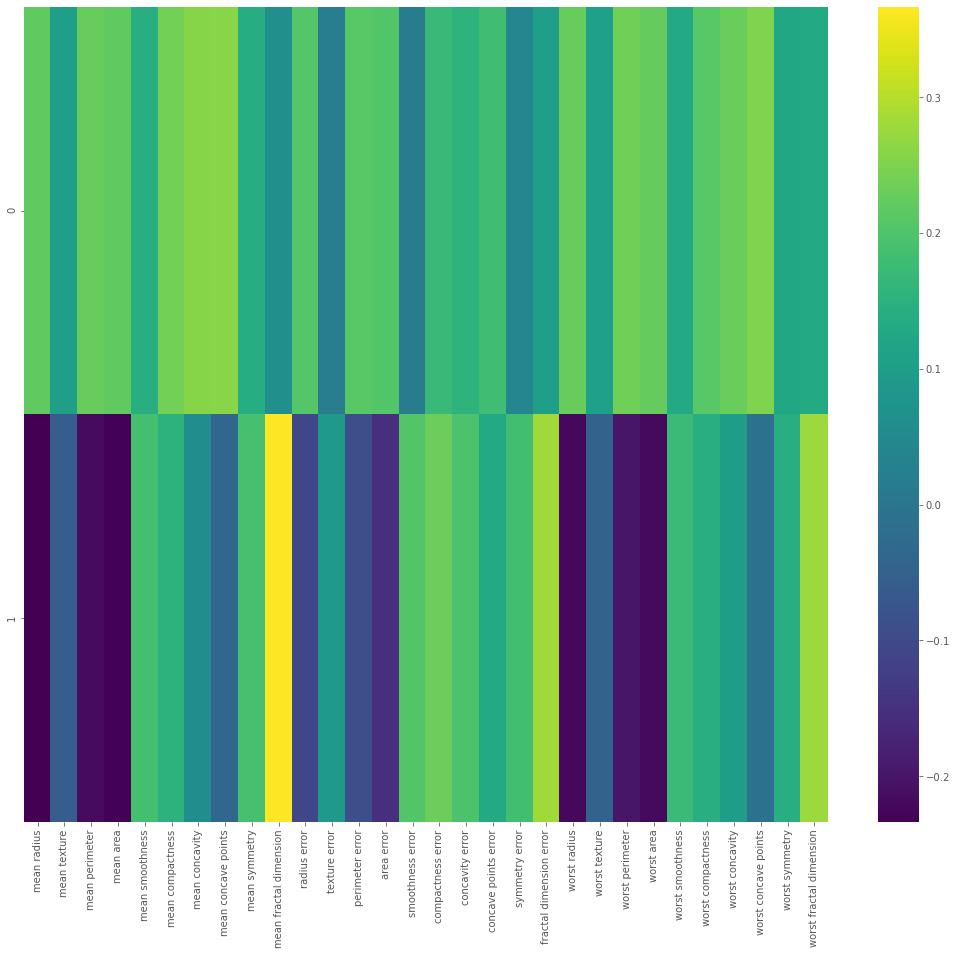

In [16]:
plt.figure(figsize=(18,15))
sns.heatmap(components_df, cmap='viridis')

In this case, for example, we see that the second principal component has a high weighting of **mean fractal dimension** (due to the light yellow colour).